In [116]:
import networkx as nx
import matplotlib.pyplot as plt

In [117]:
def read_text(file_path):
    """
    Reads the text from the specified file.

    Parameters:
    file_path (str): The path to the text file.

    Returns:
    str: The content of the file as a single string.
    """
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

In [118]:
def tokenize(code):
    """
    Tokenizes the input C code.

    Args:
        code (str): The C code to tokenize.

    Returns:
        list: A list of tokens extracted from the code.
    """
    code = remove_line_comments(code)
    code = remove_block_comments(code)
    code = normalize_code(code)
    tokens = basic_tokenization(code)
    return tokens

def normalize_code(code):
    """
    Normalizes identifiers and constants in C source code.

    Args:
    - code (str): The C source code to normalize.

    Returns:
    - str: The normalized C source code.
    """
    normalized_code = ""
    i = 0
    while i < len(code):
        if code[i].isdigit():
            normalized_code += "NUM"
            while i < len(code) and code[i].isdigit():
                i += 1
            i -= 1
        elif code[i].isalpha() or code[i] == '_':
            normalized_code += "VAR"
            while i < len(code) and (code[i].isalnum() or code[i] == '_'):
                i += 1
            i -= 1
        else:
            normalized_code += code[i]
        i += 1
    return normalized_code


def remove_line_comments(code):
    """
    Removes single-line comments from the input code.

    Args:
        code (str): The C code.

    Returns:
        str: The code with single-line comments removed.
    """
    lines = code.split('\n')
    cleaned_lines = []
    for line in lines:
        if '//' in line:
            line = line[:line.index('//')]
        cleaned_lines.append(line)
    return '\n'.join(cleaned_lines)

def remove_block_comments(code):
    """
    Removes block comments from the input code.

    Args:
        code (str): The C code.

    Returns:
        str: The code with block comments removed.
    """
    start_index = code.find('/*')
    while start_index != -1:
        end_index = code.find('*/', start_index + 2)
        if end_index == -1:
            break
        code = code[:start_index] + code[end_index + 2:]
        start_index = code.find('/*')
    return code

def basic_tokenization(code):
    """
    Performs basic tokenization of the input code.

    Args:
        code (str): The C code.

    Returns:
        list: A list of tokens extracted from the code.
    """
    tokens = []
    token = ""
    i = 0
    while i < len(code):
        if code[i].isalnum() or code[i] == '_':
            token += code[i]
        else:
            if token:
                tokens.append(token)
                token = ""
            if code[i] in "{}()[];,":
                tokens.append(code[i])
        i += 1
    if token:
        tokens.append(token)
    print(token)
    return tokens


In [119]:
def visualize_markov_chain(chain):
    G = nx.DiGraph()
    for current_token, transitions in chain.items():
        for next_token, count in transitions.items():
            G.add_edge(current_token, next_token, weight=count)

    pos = nx.spring_layout(G)
    labels = {node: node for node in G.nodes()}
    edge_labels = {(node1, node2): str(attr['weight']) for node1, node2, attr in G.edges(data=True)}

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    plt.title('Markov Chain Visualization')
    plt.show()

In [120]:

def build_markov_chain(tokens):
    """
    Builds a Markov chain from a list of tokens.

    Args:
    - tokens (list): List of tokens.

    Returns:
    - dict: Markov chain representation.
    """
    chain = {}
    for i in range(len(tokens) - 1):
        current_token = tokens[i]
        next_token = tokens[i + 1]
        if current_token in chain:
            if next_token in chain[current_token]:
                chain[current_token][next_token] += 1
            else:
                chain[current_token][next_token] = 1
        else:
            chain[current_token] = {next_token: 1}
    return chain

def markov_similarity(chain1, chain2):
    """
    Calculates the similarity between two Markov chains.

    Args:
    - chain1 (dict): Markov chain 1.
    - chain2 (dict): Markov chain 2.

    Returns:
    - float: Similarity between the two chains.
    """
    all_tokens = set(chain1.keys()).union(chain2.keys())
    similarity = 0.0
    for token in all_tokens:
        transitions1 = chain1.get(token, {})
        transitions2 = chain2.get(token, {})
        total = sum(transitions1.values()) + sum(transitions2.values())
        common = sum((transitions1.get(t, 0) & transitions2.get(t, 0)) for t in set(transitions1.keys()).intersection(transitions2.keys()))
        if total > 0:
            similarity += (2.0 * common) / total
    return similarity / len(all_tokens) if all_tokens else 0.0

def compare_c_codes(code1, code2):
    tokens1 = tokenize(code1)
    tokens2 = tokenize(code2)
    
    chain1 = build_markov_chain(tokens1)
    chain2 = build_markov_chain(tokens2)
    
    visualize_markov_chain(chain1)
    visualize_markov_chain(chain2)
    
    return markov_similarity(chain1, chain2)


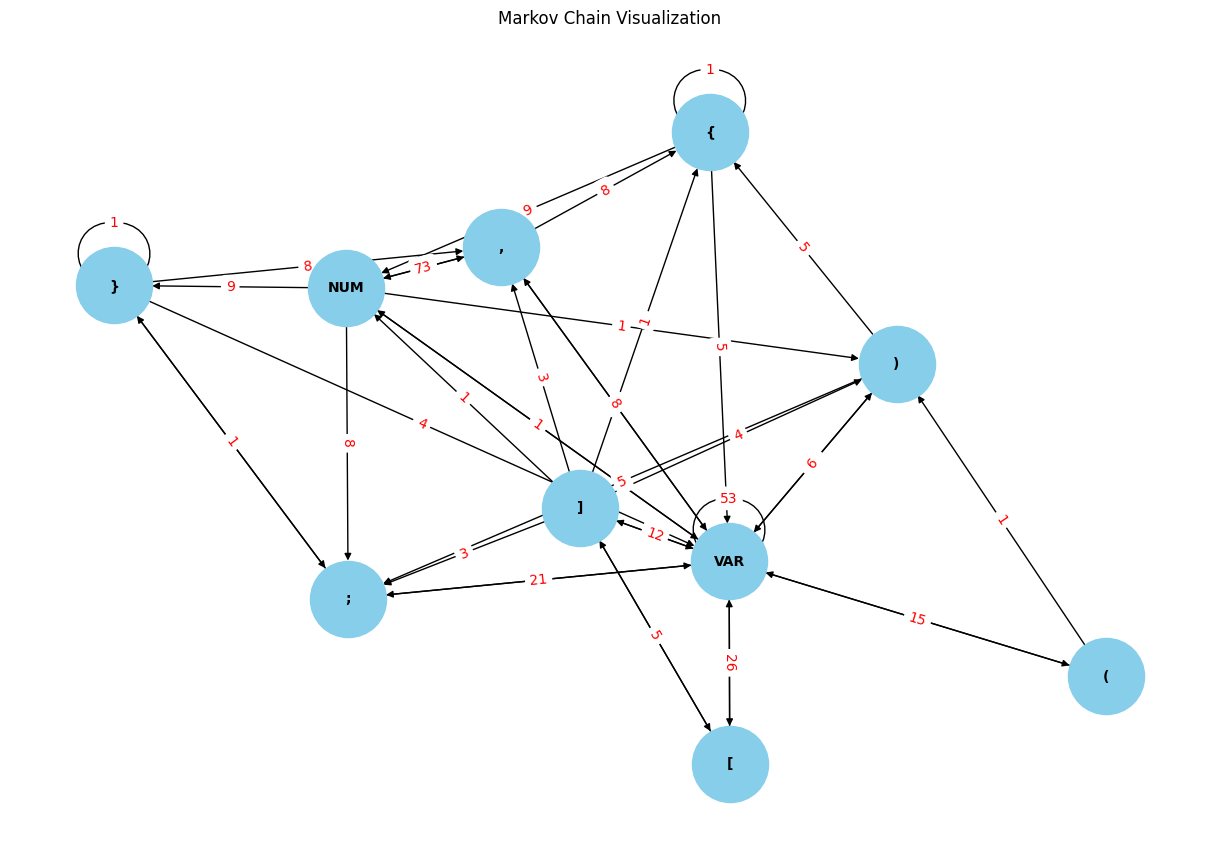

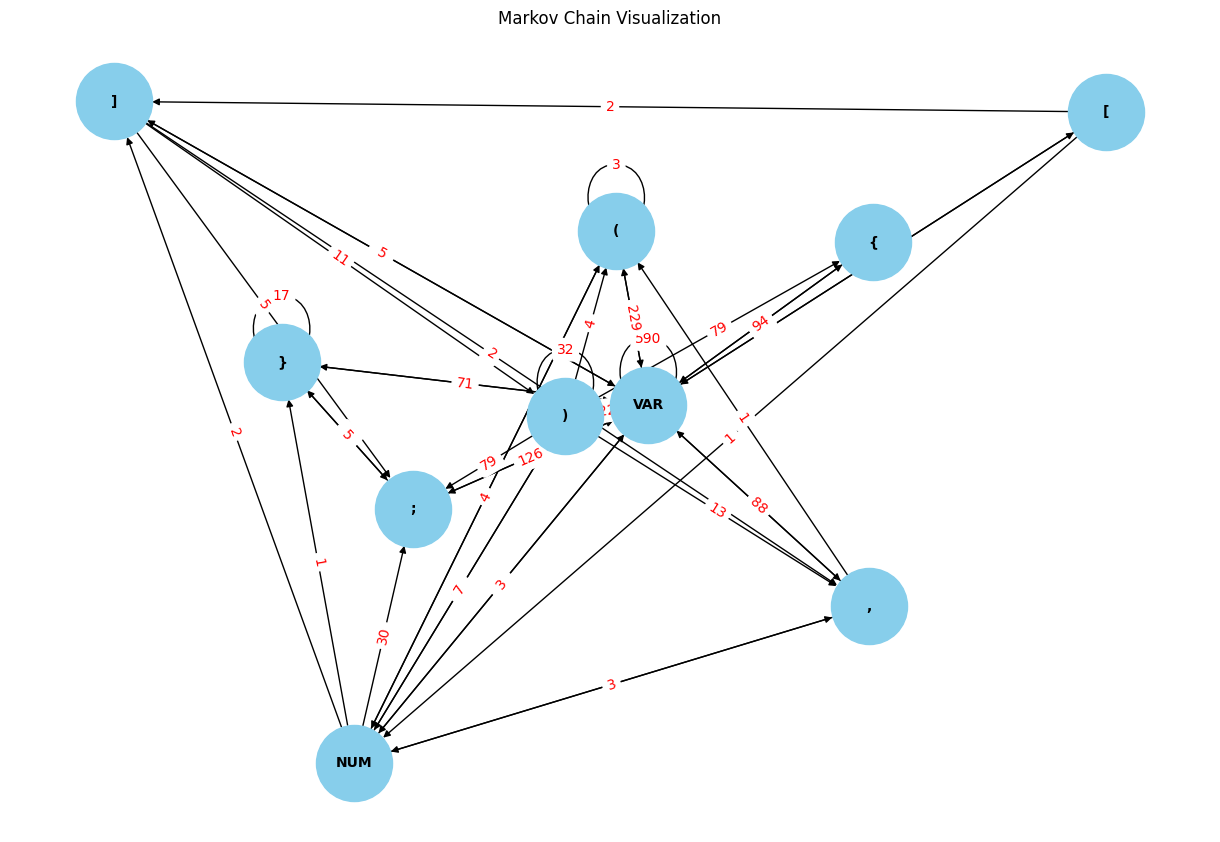

Similarity: 0.18097405418705964


In [121]:
CODE1 = read_text("code1.c")
CODE2 = read_text("code2.c")

similarity = compare_c_codes(CODE1, CODE2)
print(f"Similarity: {similarity}")